In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
# importとデータ読み込み
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

df_train = pd.read_csv('../input/bike-sharing-demand/train.csv', parse_dates=['datetime'])
df_test = pd.read_csv('../input/bike-sharing-demand/test.csv', parse_dates=['datetime'])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def split_datetime(df):
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df = df.drop(['datetime'],axis = 1)
    return df

In [4]:
df_train = split_datetime(df_train)
df_test = split_datetime(df_test)
df_train = df_train.drop(['casual','registered'],axis = 1)
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [5]:
#split train & test （x：入力値、y：目的値）
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(df_train.drop(['count'], axis = 1), df_train['count'], test_size = 0.3, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.3, random_state = 1)

In [6]:
X_train.shape, X_val.shape, X_test.shape

((5334, 12), (2286, 12), (3266, 12))

## RandomForestRegressor

In [7]:
from sklearn.ensemble import RandomForestRegressor

model_RF=RandomForestRegressor(max_depth=10, min_samples_split=30 ,random_state=0)
model_RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=30, random_state=0)

In [8]:
print(f'train score: {model_RF.score(X_train, y_train)}')
print(f'val score: {model_RF.score(X_val, y_val)}')

train score: 0.9224389893598652
val score: 0.9060219451955863


In [9]:
print(f'test score: {model_RF.score(X_test, y_test)}')

test score: 0.907878640884704


In [10]:
def rmsle(y,pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=np.square(log_y-log_pred)
    return (np.sqrt(np.mean(squared_error)))

In [11]:
pred_x = model_RF.predict(X_test)
rmsle(y_test,pred_x)

0.4223303508647249

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
estimator = RandomForestRegressor(random_state=0)
param_grid = [{
    'max_depth':[20, 35, 50],
    'min_samples_split':[2, 3, 4]
}]
cv = 5 

tuned_model = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv)

In [14]:
tuned_model.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid=[{'max_depth': [20, 35, 50],
                          'min_samples_split': [2, 3, 4]}])

In [15]:
pd.DataFrame(tuned_model.cv_results_).T

,0,1,2,3,4,5,6,7,8
mean_fit_time,2.011141,1.947397,1.844686,2.024512,1.921833,1.843479,2.016463,1.931448,1.852583
std_fit_time,0.007929,0.057375,0.021197,0.00528,0.006721,0.007563,0.011158,0.010904,0.00609
mean_score_time,0.042757,0.039061,0.036382,0.043896,0.039532,0.035683,0.044303,0.040313,0.037191
std_score_time,0.000532,0.000604,0.000215,0.000431,0.000749,0.000407,0.001263,0.00062,0.002262
param_max_depth,20,20,20,35,35,35,50,50,50
param_min_samples_split,2,3,4,2,3,4,2,3,4
params,"{'max_depth': 20, 'min_samples_split': 2}","{'max_depth': 20, 'min_samples_split': 3}","{'max_depth': 20, 'min_samples_split': 4}","{'max_depth': 35, 'min_samples_split': 2}","{'max_depth': 35, 'min_samples_split': 3}","{'max_depth': 35, 'min_samples_split': 4}","{'max_depth': 50, 'min_samples_split': 2}","{'max_depth': 50, 'min_samples_split': 3}","{'max_depth': 50, 'min_samples_split': 4}"
split0_test_score,0.938892,0.938089,0.937709,0.93836,0.93794,0.937956,0.93836,0.93794,0.937956
split1_test_score,0.928019,0.927479,0.927797,0.928419,0.927752,0.92827,0.928419,0.927752,0.92827
split2_test_score,0.93335,0.93342,0.932431,0.933313,0.933212,0.932499,0.933313,0.933212,0.932499


In [16]:
tuned_model.best_params_

{'max_depth': 35, 'min_samples_split': 2}

In [17]:
best_model = tuned_model.best_estimator_
print(f'train score: {best_model.score(X_train, y_train)}')
print(f'val score: {best_model.score(X_val, y_val)}')

train score: 0.9914332879959791
val score: 0.9914444309229077


In [18]:
print(f'test score: {best_model.score(X_test, y_test)}')

test score: 0.9459870849204794


In [19]:
pred_x = best_model.predict(X_test)
rmsle(y_test,pred_x)

0.34929499281332826

In [20]:
result = best_model.predict(df_test)

In [21]:
submission = pd.read_csv('../input/bike-sharing-demand/sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [22]:
result.shape

(6493,)

In [23]:
submission.loc[:, 'count'] = result
submission

,datetime,count
0,2011-01-20 00:00:00,11.66
1,2011-01-20 01:00:00,5.98
2,2011-01-20 02:00:00,5.52
3,2011-01-20 03:00:00,3.27
4,2011-01-20 04:00:00,2.65
...,...,...
6488,2012-12-31 19:00:00,319.60
6489,2012-12-31 20:00:00,216.68
6490,2012-12-31 21:00:00,158.67
6491,2012-12-31 22:00:00,119.90


In [24]:
submission.to_csv("submission.csv", index = False)
submission

,datetime,count
0,2011-01-20 00:00:00,11.66
1,2011-01-20 01:00:00,5.98
2,2011-01-20 02:00:00,5.52
3,2011-01-20 03:00:00,3.27
4,2011-01-20 04:00:00,2.65
...,...,...
6488,2012-12-31 19:00:00,319.60
6489,2012-12-31 20:00:00,216.68
6490,2012-12-31 21:00:00,158.67
6491,2012-12-31 22:00:00,119.90


##  特徴量重要度

In [25]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df_train.drop('count',axis=1).columns) 
f_importance = np.array(model_RF.feature_importances_) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance}).sort_values("importance",ascending=False)
# lgb.plot_importance(model_RF)

In [26]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
      n_features = len(df)                              # 特徴量数(説明変数の個数) 
      df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
      f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
      plt.barh(range(n_features), f_importance_plot, align='center') 
      cols_plot = df_plot['feature'].values             # 特徴量の取得 
      plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
      plt.xlabel('Feature importance')                  # x軸のタイトル
      plt.ylabel('Feature')                             # y軸のタイトル

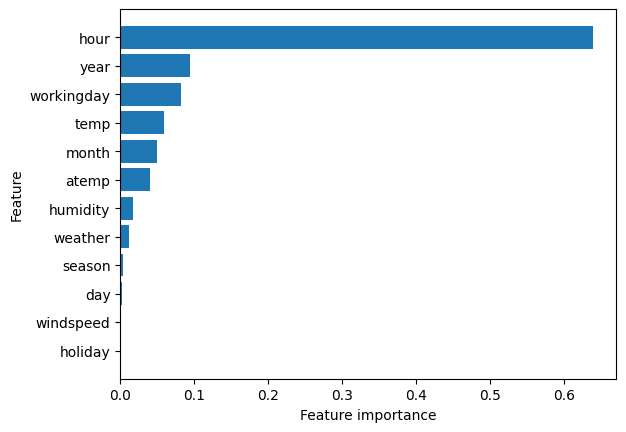

In [27]:
plot_feature_importance(df_importance)

## モデルのチューニング